In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import and Select Data

In [4]:
data = pd.read_csv('./2020_LoL_esports_match_data_from_OraclesElixir_20200924.csv')

df = pd.DataFrame(data=data)

df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,23.0,4888.0,7368.0,131.0,4723.0,7202.0,118.0,165.0,166.0,13.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-10.0,4385.0,4817.0,91.0,4784.0,4667.0,98.0,-399.0,150.0,-7.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-9.0,4809.0,6275.0,129.0,5218.0,8112.0,140.0,-409.0,-1837.0,-11.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,3.0,4915.0,4959.0,136.0,4864.0,5360.0,135.0,51.0,-401.0,1.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,1.0,2956.0,3800.0,20.0,3189.0,3543.0,28.0,-233.0,257.0,-8.0


In [5]:
new_df = df[df['datacompleteness']=='complete']

# Victory Statistics of Red and Blue Teams

In [29]:
win_loss = new_df[(new_df['playerid']==100) | (new_df['playerid']==200)]

n = len(win_loss)/2

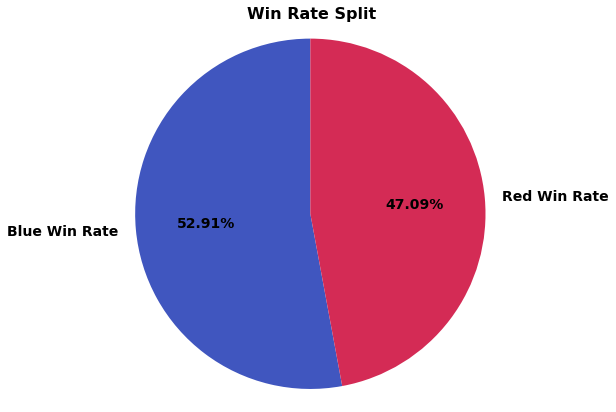

In [30]:
Team1_win = (win_loss[(win_loss['playerid']==100) & (win_loss['result'] == 1)]).count()

Team2_win = (win_loss[(win_loss['playerid']==200) & (win_loss['result'] == 1)]).count()

Team1_win_percent = (Team1_win/n) * 100

Team2_win_percent = (Team2_win/n) * 100

T1 = Team1_win_percent['result']

T2 = Team2_win_percent['result']

plt.figure(figsize=(7,7))

plt.pie((T1,T2), labels = ('Blue Win Rate', 'Red Win Rate'), startangle = 90, autopct='%.2f%%',colors=('#4056BF','#D42B55')
        ,textprops={'fontsize': 14,'color':'black','weight': 'bold'})

plt.axis('equal')

plt.title('Win Rate Split',weight='bold',fontsize=16)

plt.show()

Now, the team color is based on the random spawn of each team on either side the map. A team cannot choose to be on one side or the other.

Teams who spawn on Blue side (Blue Team) seem to win more in these pro games. This seems unfair on the surface for obvious reasons - the game is predictably skewed towards Blue Team before action even begins. We would like to assume the fair scenario in that both teams have an equal chance of winning irregardless of their sides.

# Hypothesis Testing 

### Hypothesis:
    H0: Blue Team Winning Rate = 50%  
    H1: Blue Team Winning Rate != 50%
    Mu = 0.05

In [8]:
blue_team = win_loss[win_loss['playerid']==100]

blue_team['result'].describe()

count    5579.000000
mean        0.529127
std         0.499196
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: result, dtype: float64

In [11]:
import scipy

t_test = scipy.stats.ttest_1samp(blue_team['result'], .50)

t_value = t_test[0]

p_value = t_test[1]

print('t value: '+str(t_value), 'p value: '+ '{0:.16f}'.format(p_value))

t value: 4.358172413029409 p value: 0.0000133508554967


p value <= .05, Reject H0

In [12]:
scipy.stats.t.interval(0.95, len(blue_team['result'])-1, loc=np.mean(blue_team['result']),
                       scale=scipy.stats.sem(blue_team['result']))

(0.5160251639689845, 0.5422290034445304)

We have a 95% confidence interval that tells us that the true win rate of Blue Team is between:

    LL         UL
    51.6  and  54.2
                           
Now, it is up to the statistician to assume whether the side of the map truly matters.

# Winning Probabilities based on Game Objectives

In [13]:
p_firstblood = win_loss[(win_loss['firstblood'] == 1) & (win_loss['result'] == 1)].count()/win_loss[win_loss['firstblood'] == 1].count()

p_firstmidtower = win_loss[(win_loss['firstmidtower'] == 1) & (win_loss['result'] == 1)].count()/win_loss[win_loss['firstmidtower'] == 1].count()

p_firsttothreetowers = win_loss[(win_loss['firsttothreetowers'] == 1) & (win_loss['result'] == 1)].count()/win_loss[win_loss['firsttothreetowers'] == 1].count()

p_firsttower = win_loss[(win_loss['firsttower'] == 1) & (win_loss['result'] == 1)].count()/win_loss[win_loss['firsttower'] == 1].count()

p_firstbaron = win_loss[(win_loss['firstbaron'] == 1) & (win_loss['result'] == 1)].count()/win_loss[win_loss['firstbaron'] == 1].count()

p_firstdragon = win_loss[(win_loss['firstdragon'] == 1) & (win_loss['result'] == 1)].count()/win_loss[win_loss['firstdragon'] == 1].count()

p_firstherald = win_loss[(win_loss['firstherald'] == 1) & (win_loss['result'] == 1)].count()/win_loss[win_loss['firstherald'] == 1].count()

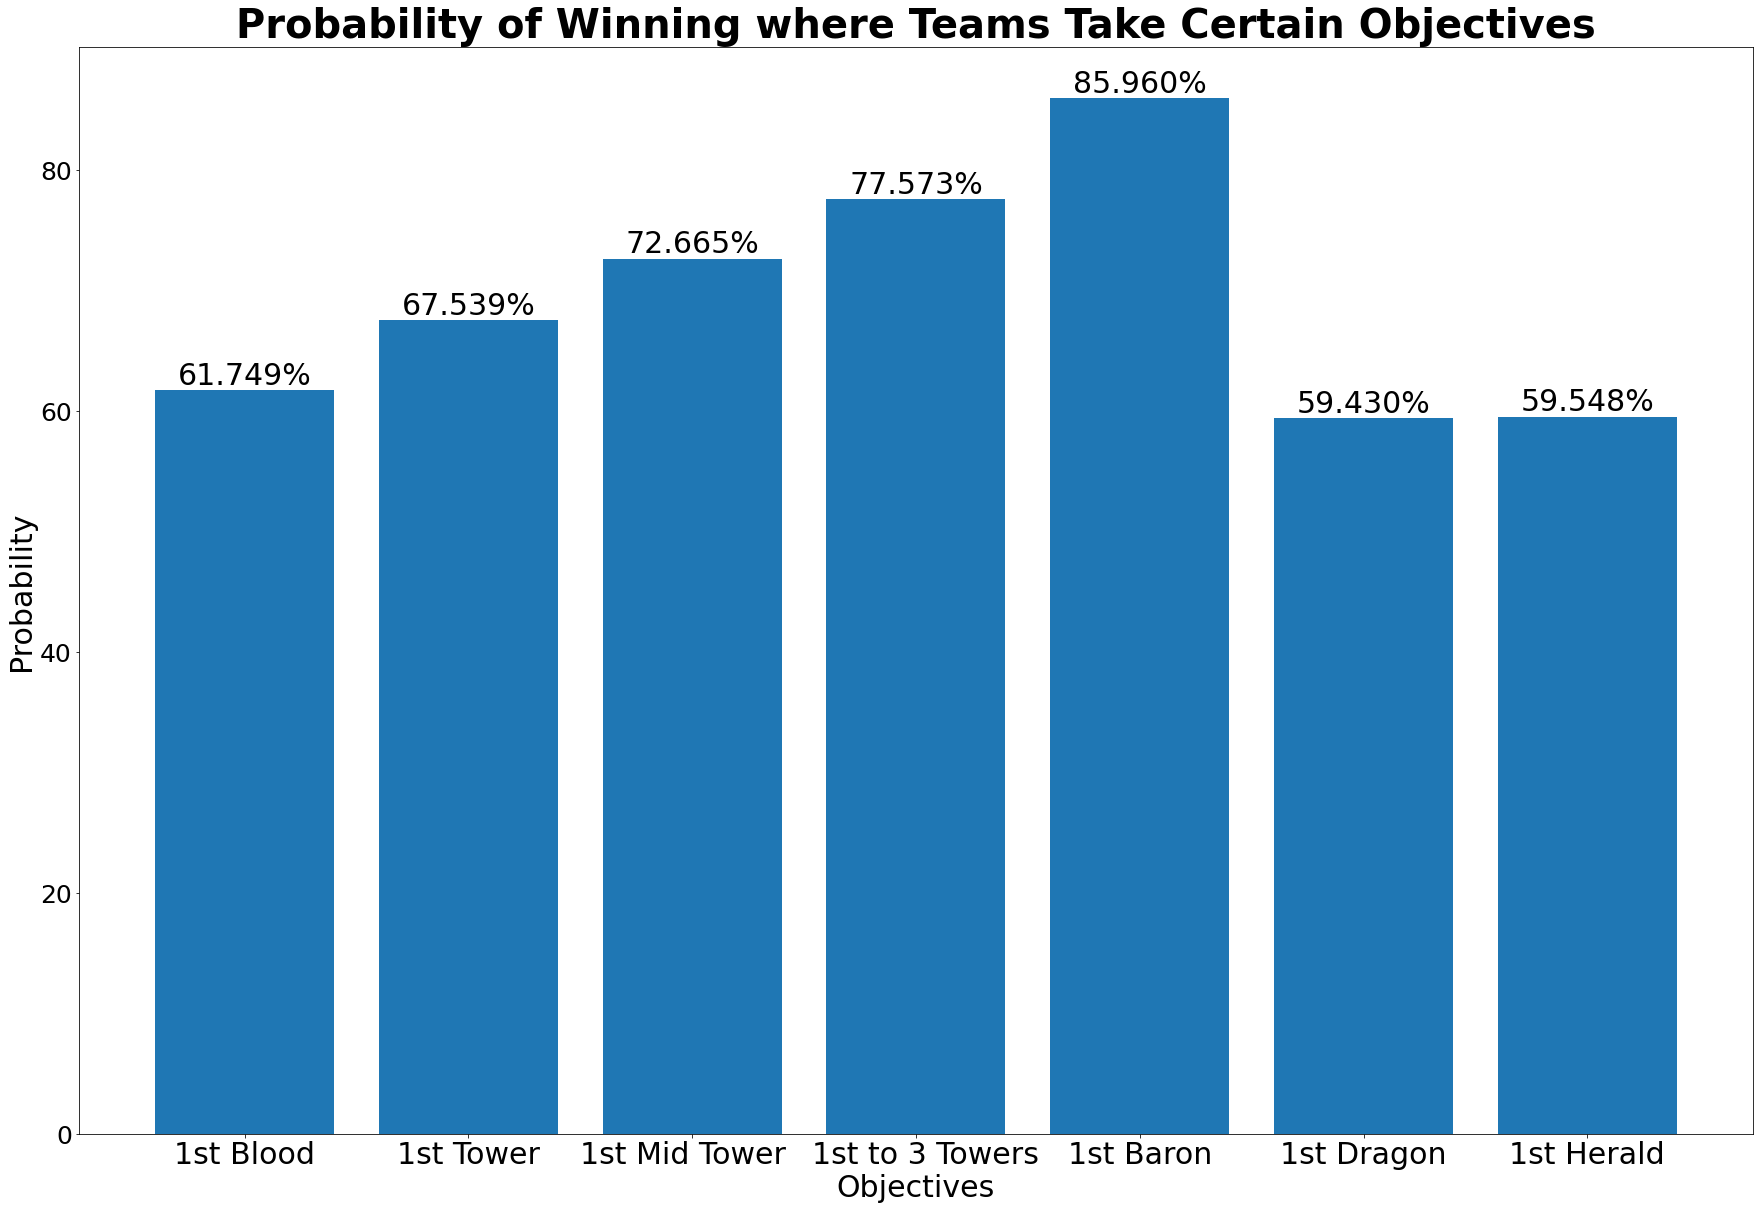

In [28]:
labels = ('1st Blood', '1st Tower','1st Mid Tower  ','  1st to 3 Towers', '1st Baron', '1st Dragon', '1st Herald')

p = [p_firstblood['gamelength'], p_firsttower['gamelength']
                 ,p_firstmidtower['gamelength'],p_firsttothreetowers['gamelength']
                 , p_firstbaron['gamelength'],p_firstdragon['gamelength'] ,p_firstherald['gamelength']]
p = [i * 100 for i in p]

y_pos = np.arange(len(labels))

plt.figure(figsize=(30,20))

plt.bar(y_pos, p, align='center', alpha=1)

plt.xticks(y_pos, labels=labels, fontsize = 30)

plt.yticks(fontsize = 25)

plt.xlabel('Objectives', fontsize = 30)

plt.ylabel('Probability', fontsize = 30)

plt.title('Probability of Winning where Teams Take Certain Objectives', fontsize = 40, weight='bold')

for a,b in zip(y_pos, p):
    
    plt.text(a, b, '%.3f'%b+'%', ha='center', va= 'bottom',fontsize=30)
    
plt.show()

# Predicting + Modeling

## Data Prepration

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import random

In [23]:
scaler=MinMaxScaler()

X = win_loss[['firstdragon','firstherald','firstbaron','firsttower','firstmidtower','firsttothreetowers']].copy()

y = win_loss[['result']].values.ravel()

X.fillna(.5, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=99)

scaler.fit_transform(X_train)

scaler.fit_transform(X_test)

array([[1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 0., 1.],
       ...,
       [1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

## Quick Correlation Matrix Before We Start Modeling

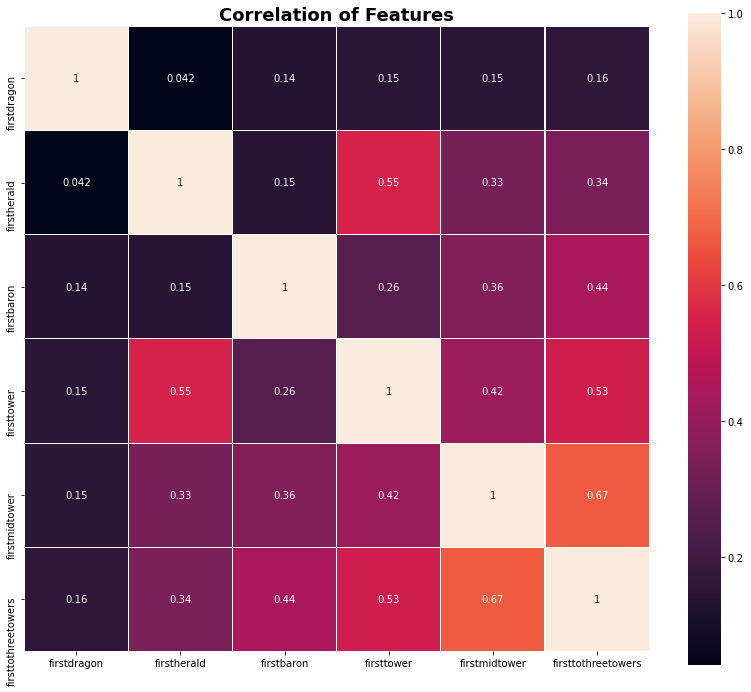

In [24]:
import seaborn as sns

plt.figure(figsize=(14,12))

plt.title('Correlation of Features',weight='bold',size=18)

sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True)

plt.show()

# Logistic Regression

In [25]:
clf_log = LogisticRegression()

clf_log.fit(X_train,y_train)

pred = clf_log.predict(X_train)

scores = cross_val_score(clf_log,X,y)
 
pred_1 = clf_log.predict(X_test)

#clf_log.score(X_test,y_test)

print(classification_report(y_train, pred))

print(classification_report(y_test, pred_1))

print('Cross Validation Score: {0}'.format(scores.mean()))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      3717
           1       0.84      0.86      0.85      3758

    accuracy                           0.85      7475
   macro avg       0.85      0.85      0.85      7475
weighted avg       0.85      0.85      0.85      7475

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1862
           1       0.83      0.85      0.84      1821

    accuracy                           0.84      3683
   macro avg       0.84      0.84      0.84      3683
weighted avg       0.84      0.84      0.84      3683

Cross Validation Score: 0.84486548295523


# SVM Model

In [26]:
clf_svm = svm.SVC(kernel='linear',gamma='auto')

clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print('Cross Validation Score: {0}'.format((cross_val_score(clf_svm,X,y)).mean()))

[[1596  266]
 [ 353 1468]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1862
           1       0.85      0.81      0.83      1821

    accuracy                           0.83      3683
   macro avg       0.83      0.83      0.83      3683
weighted avg       0.83      0.83      0.83      3683

Cross Validation Score: 0.8324077956587608


## SVM Tuning

In [1004]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1,8,16,32]}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=6)

clf.fit(X_train, y_train)

pred2=clf.predict(X_test)

print(classification_report(y_test, pred2))

print('Tuned score: {0}'.format(clf.score(X_train,y_train)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1862
           1       0.83      0.85      0.84      1821

    accuracy                           0.84      3683
   macro avg       0.84      0.84      0.84      3683
weighted avg       0.84      0.84      0.84      3683

Tuned score: 0.8503010033444816


These are great outcomes. We are predicting with ~85% accuracy that the selected features help us predict team Victory or Defeat. This makes sense in that our features selected are end-game stats what denote specific game objectives.

How is this a good thing? Because the game is vastly more complex than reliance game objectives, AND we're analyzing PROFESSIONAL games. This, more than anything proves, the skill level of these players that allow them to succeed beyond eminently negative situations (15% of the time according to our models).